In [1]:
#Main imports
import sklearn as skl
import pandas as pd
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
rng = np.random.default_rng()

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import Perceptron


# Decision Tree by Hand Questions

In [2]:
def H(p):
    if p == 0:
        return -((1-p)*np.log2(1-p))
    elif p == 1:
        return -(p*np.log2(p))
    else:
        return -(p*np.log2(p)+(1-p)*np.log2(1-p))

def H(*args):
    f = 0
    aa = 0
    for arg in args:
        aa += arg
        if arg !=0:
            f -= arg*np.log2(arg)
    
    if 1-aa != 0:
        f-= (1-aa)*np.log2(1-aa)
    
    return f

def G(p):
    return 1-p**2-(1-p)**2

# n, n1 = 5, 3
# n0 = z1-n1
# h = n/N*H(n1/n)+(N-n)/N*H(n0/(N-n))
# print(h,H(P)-h)

z1, z2 = 2, 1
NN=z1+z2

P=z1/NN


h, g = 0, 0
# for N, n in zip([2*2+3, 2*2+1], [2*2, 2*2]):
# for N, n in zip([2*1+4, 2*3+0], [2*1, 2*3]):
# for N, n in zip([2*2+3, 2*2+1], [2*2, 2*2]):
# for N, n in zip([2*1+2, 2*3+2], [2*1, 2*3]):
# for N, n in zip([5, 1], [2, 0]): # t2 = 1
# for N, n in zip([3, 3], [0, 2]): # t2 = 1
# for N, n in zip([2, 4], [0, 2]): # t2 = 1
for N, n in zip([3, 0], [1, 0]): # t2 = 1, t3 = 1
    if N != 0:
        h += N/NN*H(n/N)


# for N, n in zip([5, 7], [3, 3]):
#     g += N/NN*G(n/N)

# for N, n in zip([2, 3, 2, 2, 1, 2], [1, 2, 0, 1, 1, 1]):
#     h += N/NN*H(n/N)
#     g += N/NN*G(n/N)

# for N, n in zip([3, 1], [2, 0]):
# for N, n in zip([2, 2], [1, 1]):
# for N, n in zip([2, 2], [1, 1]):
# for N, n in zip([2, 1], [1, 1]): # t1=1
# for N, n in zip([1, 2], [1, 1]): # t1=1
    # h += N/NN*H(n/N)



print(h,H(P)-h)
# print(g, G(P)-g)

0.9182958340544896 0.0


# Magic Telescope

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

magic_raw = pd.read_csv("../datasets/magic04.data", header=None)
magic_raw.columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
print("Contains nan? ", magic_raw.isnull().values.any())

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(magic_raw, magic_raw["class"]):
    magic = magic_raw.loc[train_index]
    magic_test = magic_raw.loc[test_index]


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

attributes = magic.columns[:-1]

pipe = ColumnTransformer([
    ('encoder', OrdinalEncoder(), ['class']),
    ('std_scaler', StandardScaler(), attributes),
])

magic2 = pipe.fit_transform(magic)
X_train, y_train = magic2[:,1:],magic2[:,0]

magic2_test = pipe.fit_transform(magic_test)
X_test, y_test = magic2_test[:,1:],magic2_test[:,0]

magic.describe()


Contains nan?  False


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000
mean,53.145513,22.107906,2.824776,0.380330,0.214794,-4.252222,10.725188,0.373504,27.628205,193.520210
std,42.260037,18.269273,0.472086,0.182361,0.110440,58.728597,51.079339,20.703234,26.048083,74.483869
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,5.592200
25%,24.268900,11.858250,2.476400,0.236400,0.128425,-20.357775,-12.793175,-10.854425,5.559650,142.257675
50%,37.143200,17.108750,2.741000,0.354750,0.196700,4.487700,15.325500,1.209300,17.720350,191.561000
75%,69.927000,24.717650,3.099500,0.503200,0.285500,24.320175,35.824650,10.901350,45.827250,240.716300
max,334.177000,256.382000,5.323300,0.893000,0.675200,473.065400,238.321000,179.851000,90.000000,495.561000


Perceptron: 0.7124079915878023
Random Forest: 0.8810024535576586
AdaBoost: 0.8401682439537329
Gradient Boost: 0.8727655099894848


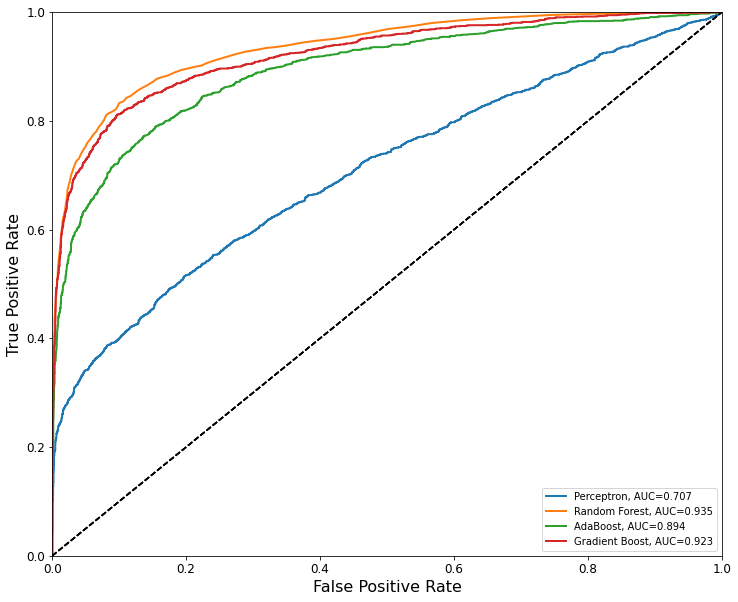

In [4]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

clfs = [Perceptron(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]
names = ["Perceptron", "Random Forest", "AdaBoost", "Gradient Boost"]

for clf, name in zip(clfs, names):
    clf.fit(X_train, y_train)
    print(f"{name}: {clf.score(X_test, y_test)}")


fprs = []
tprs = []
aucs = []
for clf in clfs:
    try:
        fpr, tpr, thresh = roc_curve(y_test, clf.decision_function(X_test))
    except:
        fpr, tpr, thresh = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(metrics.auc(fpr, tpr))

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)


plt.figure(figsize=(12, 10))
for name, fpr, tpr, auc in zip(names, fprs, tprs, aucs):
    plot_roc_curve(fpr, tpr, f"{name}, AUC={auc:.3f}")

plt.legend()
plt.show()

# MiniBooNE particle identification Data Set


In [5]:
fname = "../datasets/MiniBooNE_PID.txt"
with open(fname, 'r') as f:
    # print(f.readline().strip().split(" "))
    nsignal, nbackground = [int(x) for x in f.readline().strip().split(" ")]
    print(nsignal, nbackground)
    signal, background = np.zeros((nsignal,50),dtype=float), np.zeros((nbackground,50),dtype=float)
    for i, line in enumerate(f):
        if i < nsignal:
            signal[i]= [float(x) for x in line.strip().split()]
        else:
            background[i-nsignal]= [float(x) for x in line.strip().split()]


X_train = np.r_[signal[:int(nsignal*.3),:], background[:int(nbackground*.3),:]]
X_test = np.r_[signal[int(nsignal*.3):,:], background[int(nbackground*.3):,:]]
y_train = np.r_[np.ones(int(nsignal*.3)), np.zeros(int(nbackground*.3))]
y_test = np.r_[np.ones(nsignal-int(nsignal*.3)), np.zeros(nbackground-int(nbackground*.3))]

col_med_train = np.median(X_train, axis=0)
col_med_test = np.median(X_test, axis=0)
inds_train = np.where(X_train < -998)
inds_test = np.where(X_test < -998)
X_train[inds_train] = np.take(col_med_train, inds_train[1])
X_test[inds_test] = np.take(col_med_test, inds_test[1])


36499 93565


Perceptron: 0.8421786789095622
Random Forest: 0.9311446960876919
AdaBoost: 0.9119675768292951
Gradient Boost: 0.9277837576609625


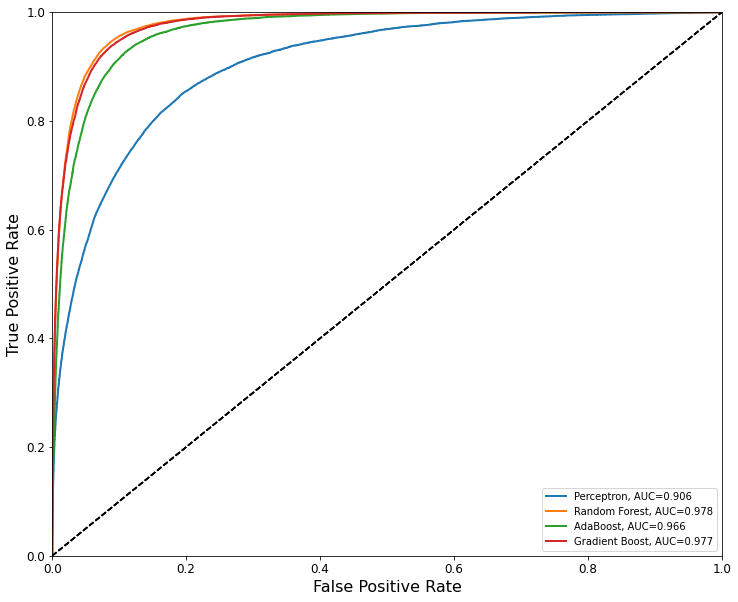

In [6]:
for clf, name in zip(clfs, names):
    clf.fit(X_train, y_train)
    print(f"{name}: {clf.score(X_test, y_test)}")

fprs = []
tprs = []
aucs = []
for clf in clfs:
    try:
        fpr, tpr, thresh = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
        auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    except:
        fpr, tpr, thresh = roc_curve(y_test, clf.decision_function(X_test))
        auc_score = metrics.auc(fpr, tpr)
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(auc_score)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)


plt.figure(figsize=(12, 10))
for name, fpr, tpr, auc in zip(names, fprs, tprs, aucs):
    plot_roc_curve(fpr, tpr, f"{name}, AUC={auc:.3f}")

plt.legend()
plt.show()

# Congressional Votes

In [7]:
votes = pd.read_csv('../datasets/house-votes-84.data', header=None)

enc = OrdinalEncoder()
votes = enc.fit_transform(votes)
votes = pd.DataFrame(votes)

votes.columns = ["Class","handicapped","water","budget","physician","el-salvador",\
    "religious","satellite","nicaraguan","missile","immigration", "cutback","education",\
    "sue","crime","duty-free","export"]

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(votes, votes["Class"]):
    votes_train = votes.loc[train_index].to_numpy()
    votes_test = votes.loc[test_index].to_numpy()

y_train = votes_train[:,0]
X_train = votes_train[:,1:]

y_test = votes_test[:,0]
X_test = votes_test[:,1:]

votes.describe()

,Class,handicapped,water,budget,physician,el-salvador,religious,satellite,nicaraguan,missile,immigration,cutback,education,sue,crime,duty-free,export
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.00000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.386207,1.402299,1.337931,1.556322,1.381609,1.452874,1.60000,1.517241,1.521839,1.425287,1.480460,1.296552,1.321839,1.422989,1.531034,1.335632,1.379310
std,0.487440,0.544342,0.667418,0.545974,0.535928,0.563449,0.53967,0.561065,0.564998,0.588527,0.531462,0.553049,0.601347,0.599866,0.572671,0.593742,0.845718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.00000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000
75%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Perceptron: 0.9655172413793104
Random Forest: 0.9655172413793104
AdaBoost: 0.9770114942528736
Gradient Boost: 0.9770114942528736


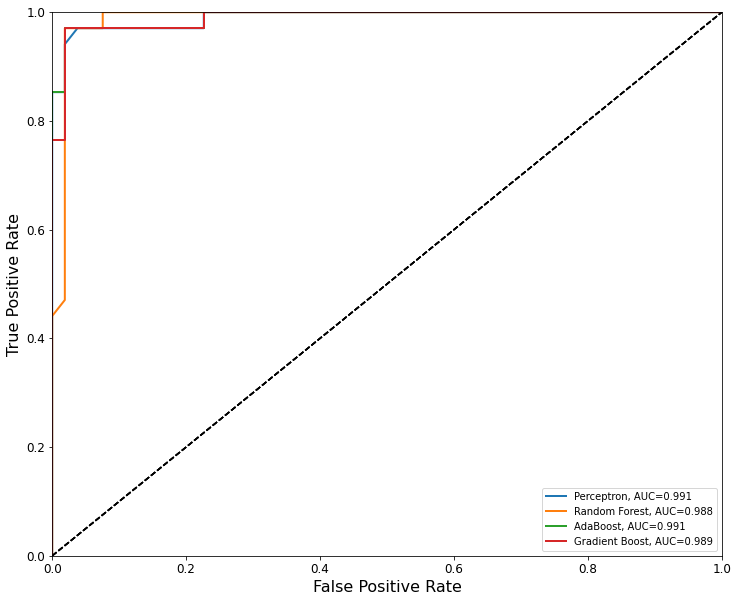

In [8]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

for clf, name in zip(clfs, names):
    clf.fit(X_train, y_train)
    print(f"{name}: {clf.score(X_test, y_test)}")

fprs = []
tprs = []
aucs = []
for clf in clfs:
    try:
        fpr, tpr, thresh = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
        auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    except:
        fpr, tpr, thresh = roc_curve(y_test, clf.decision_function(X_test))
        auc_score = metrics.auc(fpr, tpr)
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(auc_score)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)


plt.figure(figsize=(12, 10))
for name, fpr, tpr, auc in zip(names, fprs, tprs, aucs):
    plot_roc_curve(fpr, tpr, f"{name}, AUC={auc:.3f}")

plt.legend()
plt.show()

# Landsat Satellite


In [9]:
from sklearn.preprocessing import LabelBinarizer

train = pd.read_csv('../datasets/sat.trn', delimiter=' ', header=None)
test = pd.read_csv('../datasets/sat.tst', delimiter=' ', header=None)
enc = OrdinalEncoder()
y_train = train.to_numpy()[:,36]
X_train = train.to_numpy()[:,:36]

y_test = test.to_numpy()[:,36]
X_test = test.to_numpy()[:,:36]

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train.reshape(-1,1))#.flatten()
y_test = lb.transform(y_test.reshape(-1,1))#.flatten()

train.describe()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
count,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,...,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000
mean,69.473957,83.855242,99.322886,82.555581,69.208794,83.499436,99.174521,82.480496,68.963472,83.131003,...,82.673957,69.033145,83.434273,99.183766,82.638106,68.797069,83.153326,99.061556,82.584442,3.650282
std,13.649635,22.725079,16.672166,18.695450,13.552423,22.811809,16.627583,18.714272,13.497858,22.813312,...,18.884322,13.533934,22.812090,16.741240,18.939820,13.437785,22.762684,16.660735,18.895513,2.217055
min,40.000000,27.000000,56.000000,33.000000,40.000000,27.000000,50.000000,29.000000,40.000000,27.000000,...,34.000000,39.000000,27.000000,50.000000,29.000000,40.000000,27.000000,50.000000,29.000000,1.000000
25%,60.000000,71.000000,85.000000,70.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,...,70.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,2.000000
50%,68.000000,87.000000,101.000000,83.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,...,81.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,100.000000,81.000000,3.000000
75%,80.000000,103.000000,113.000000,92.000000,80.000000,103.000000,113.000000,92.000000,79.000000,103.000000,...,92.000000,79.500000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,5.000000
max,104.000000,137.000000,140.000000,154.000000,102.000000,137.000000,145.000000,157.000000,104.000000,130.000000,...,154.000000,104.000000,128.000000,145.000000,157.000000,104.000000,130.000000,145.000000,157.000000,7.000000


Perceptron: 0.4985
Random Forest: 0.8665
AdaBoost: 0.8125
Gradient Boost: 0.843


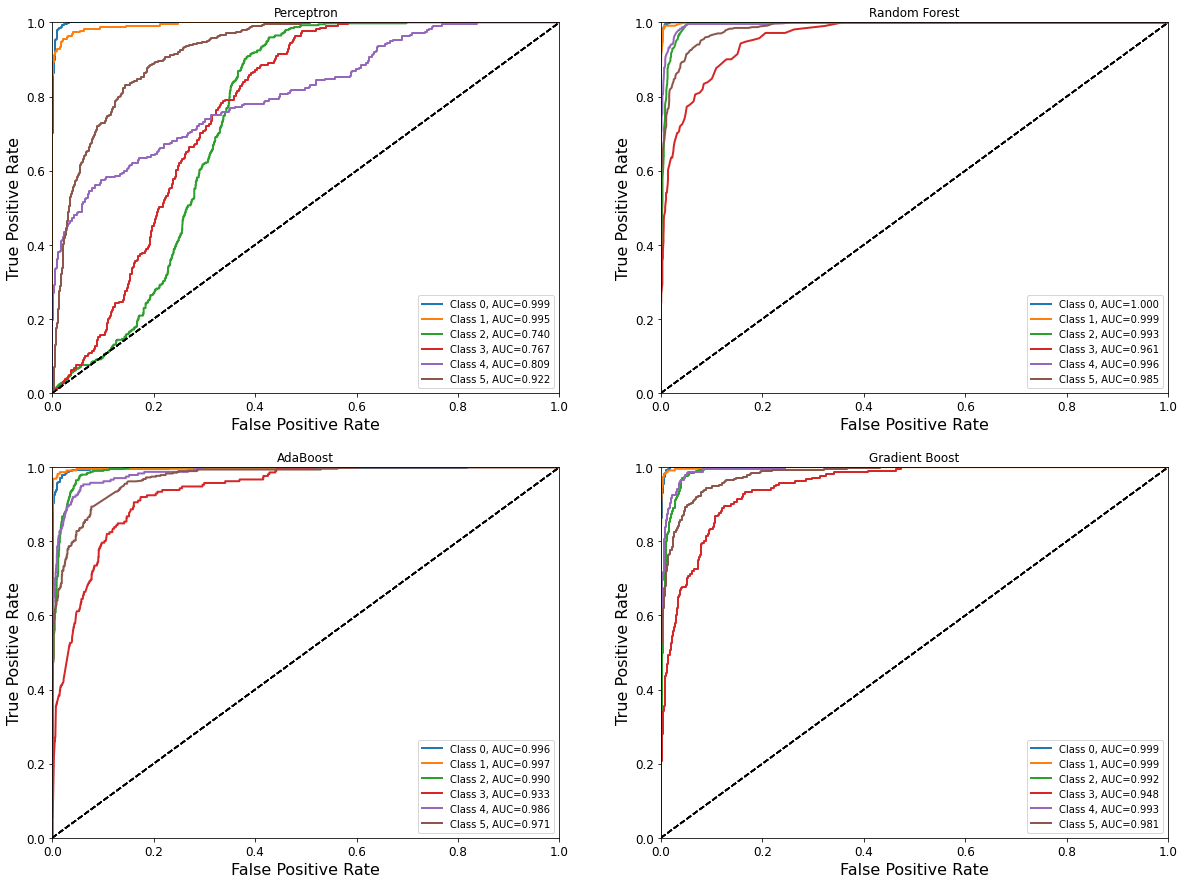

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

clfs = [OneVsRestClassifier(Perceptron()), OneVsRestClassifier(RandomForestClassifier()), OneVsRestClassifier(AdaBoostClassifier()), OneVsRestClassifier(GradientBoostingClassifier())]
names = ["Perceptron", "Random Forest", "AdaBoost", "Gradient Boost"]

for clf, name in zip(clfs, names):
    clf.fit(X_train, y_train)
    print(f"{name}: {clf.score(X_test, y_test)}")

fprs = []
tprs = []
aucs = []
for clf in clfs:
    for i in range(6):
        try:
            fpr, tpr, thresh = roc_curve(y_test[:,i], clf.predict_proba(X_test)[:, i])
            auc_score = roc_auc_score(y_test[:,i], clf.predict_proba(X_test)[:, i])
        except:
            fpr, tpr, thresh = roc_curve(y_test[:,i], clf.decision_function(X_test)[:, i])
            auc_score = metrics.auc(fpr, tpr)
        fprs.append(fpr)
        tprs.append(tpr)
        aucs.append(auc_score)

def plot_roc_curve(fpr, tpr, ax, label=None):
    ax.plot(fpr, tpr, linewidth=2, label=label)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.axis([0, 1, 0, 1])
    ax.set_xlabel('False Positive Rate', fontsize=16)
    ax.set_ylabel('True Positive Rate', fontsize=16)


f, axs = plt.subplots(2,2, figsize=(20,15))
for i in range(len(aucs)):
    ax = axs.flatten()[i//6]
    name = names[i//6]
    fpr = fprs[i]
    tpr = tprs[i]
    auc = aucs[i]
    plot_roc_curve(fpr, tpr, ax, f"Class {i%6}, AUC={auc:.3f}")
    ax.set_title(name)
    ax.legend()